 # ***Introducción***


El arte es una manifestación cultural que ha evolucionado a lo largo de la historia, y los museos desempeñan un papel clave en la preservación y difusión de este patrimonio. En la era digital, el análisis de datos ha permitido a instituciones como el Museo de Arte Moderno de Nueva York gestionar sus adquisiciones, estudiar tendencias artísticas y entender mejor el impacto de sus colecciones.

El MoMA, fundado en 1929, es una de las instituciones más influyentes en el mundo del arte moderno y contemporáneo. Su colección abarca más de 200.000 obras de arte, incluyendo pinturas, esculturas, fotografías y nuevas formas de expresión artística. El proceso de adquisición de nuevas obras es crucial para su misión de representar la diversidad del arte a nivel global.

En este proyecto, se analizarán datos de sus adquisiciones, con el objetivo de identificar patrones en las obras adquiridas. A través de técnicas de análisis de datos y aprendizaje automático, se buscará responder preguntas como: ¿qué factores influyen en la selección de una obra?, ¿qué nacionalidades están más representadas?, ¿existen tendencias en los materiales o técnicas utilizadas en las adquisiciones?
<br>
<br>
<br>

*  *Audiencia*
<br>
Esta investigación se enfoca en proporcionar una herramienta de análisis estratégico para los
niveles gerenciales y directivos del museo. Proveerles de información relevante sobre la
adquisición de obras, facilitando la toma de decisiones y la planificación estratégica a largo plazo.




# ***Hipótesis / Preguntas de interés***


*   ¿Cuál es la probabilidad de que una obra de un artista previamente adquirido sea seleccionada para futuras adquisiciones del MoMA?

*   ¿Qué países tienen mayor representación en las adquisiciones del MoMA y cómo ha cambiado esa tendencia a lo largo de los años?

*   ¿Cómo han evolucionado las preferencias del MoMA en cuanto a técnica o material de las obras adquiridas desde 1950?

*   ¿A que departamento pertenece la obra?

*   ¿La obra es moderna o no? (año >= 1980)

*   ¿La obra es nacional (EEUU) o extranjera?





# ***EDA / Visualizaciones***

In [157]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

%cd '/content/gdrive/MyDrive/Coder /Dataset'

import pandas as pd
import numpy as np


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Coder /Dataset


In [158]:
df = pd.read_csv('Artworks.csv')
df.head()

<ipython-input-158-1fb56993d529>:1: DtypeWarning: Columns (17,20,21,22,23,24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Artworks.csv')


,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,NaN,168.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,NaN,29.8451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,NaN,31.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,NaN,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,NaN,19.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132403 entries, 0 to 132402
Data columns (total 35 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Title               132349 non-null  object 
 1   Artist              130947 non-null  object 
 2   ConstituentID       130942 non-null  object 
 3   ArtistBio           127701 non-null  object 
 4   Nationality         130935 non-null  object 
 5   BeginDate           130940 non-null  object 
 6   EndDate             130940 non-null  object 
 7   Gender              130939 non-null  object 
 8   Date                130217 non-null  object 
 9   Medium              121179 non-null  object 
 10  Dimensions          121178 non-null  object 
 11  CreditLine          129462 non-null  object 
 12  AccessionNumber     132394 non-null  object 
 13  Classification      132402 non-null  object 
 14  Department          132402 non-null  object 
 15  DateAcquired        126416 non-nul

In [160]:
df.drop(columns=['Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Length (cm)', 'Weight (kg)', 'Seat Height (cm)', 'ThumbnailURL'])

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,Height (cm),Width (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,885.1996,Architecture,Architecture & Design,1996-04-09,Y,2,http://www.moma.org/collection/works/2,48.6,168.9,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,1.1995,Architecture,Architecture & Design,1995-01-17,Y,3,http://www.moma.org/collection/works/3,40.6401,29.8451,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,1.1997,Architecture,Architecture & Design,1997-01-15,Y,4,http://www.moma.org/collection/works/4,34.3,31.8,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,2.1995,Architecture,Architecture & Design,1995-01-17,Y,5,http://www.moma.org/collection/works/5,50.8,50.8,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,2.1997,Architecture,Architecture & Design,1997-01-15,Y,6,http://www.moma.org/collection/works/6,38.4,19.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132398,An Episode in the Life of a Landscape Painter ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006,Book from a multiple of archival carrying case...,...,656.2017.19,Illustrated Book,Prints & Illustrated Books,2017-10-18,N,274763,NaN,NaN,NaN,NaN
132399,Incense Sweaters & Ice (Installation),Martine Syms,68036,"(American, 1988)",(American),(1988),(0),(),2017,"Video (color, sound)",...,779.2017.1-17,Video,Media and Performance Art,2017-12-11,N,274813,NaN,NaN,NaN,4500.0
132400,Just For You,Ken Friedman,2007,"(American, born 1949)",(American),(1939),(0),(Male),1967,NaN,...,4010.2008.1-19,(not assigned),Prints & Illustrated Books,2008-10-08,N,274897,NaN,0.0,0.0,NaN
132401,Marey and Demeny Chronophotographs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1892–1900,"35mm film (black and white, silent)",...,16901,Film,Film,1999-01-25,N,274901,NaN,NaN,NaN,420.0


In [161]:
df.isnull().sum()
df_clean = df.fillna(0)

df_clean.head()


,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,0.0,168.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,0.0,29.8451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,0.0,31.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,0.0,50.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,0.0,19.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
df["Gender"].value_counts()

,count
Gender,
(Male),101217
(Female),16531
(),6178
(Male) (Male),1757
(Male) (Male) (Male),922
...,...
(Male) (Male) (Male) (Male) () () (),1
(Male) (Male) (Male) (Male) (Female) (Male),1
(Male) (Male) (Male) (Male) (Female) (Male) (Male) (Male) (Male) (Male),1


In [163]:
print(df["Classification"].head(10))

0    Architecture
1    Architecture
2    Architecture
3    Architecture
4    Architecture
5    Architecture
6    Architecture
7    Architecture
8    Architecture
9    Architecture
Name: Classification, dtype: object


In [164]:
from sklearn.preprocessing import LabelEncoder

valores_correctos = ['Architecture', 'Design', 'Prints & Illustrated Books', 'Drawings', 'Painting & Sculpture', 'Photography', 'Media and Performance Art', 'Film', 'Architecture & Design - Image Archive']

df = df[df['Department'].isin(valores_correctos)].copy()

le = LabelEncoder()
df.loc[:, 'Department_Num'] = le.fit_transform(df['Department'])

print(df[['Department', 'Department_Num']].head(1000))


                      Department  Department_Num
239                 Architecture               0
1415                      Design               2
1852                      Design               2
3897                      Design               2
3900                      Design               2
...                          ...             ...
8916  Prints & Illustrated Books               8
8917  Prints & Illustrated Books               8
8918  Prints & Illustrated Books               8
8919  Prints & Illustrated Books               8
8920  Prints & Illustrated Books               8

[1000 rows x 2 columns]


In [165]:
print(df['Department'].unique())

['Architecture' 'Design' 'Prints & Illustrated Books' 'Drawings'
 'Painting & Sculpture' 'Photography' 'Media and Performance Art' 'Film'
 'Architecture & Design - Image Archive']


In [166]:
conteo_obras_por_departamento = df.groupby('Department').size().sort_values(ascending=False)

print(conteo_obras_por_departamento)

Department
Prints & Illustrated Books               60604
Photography                              29475
Drawings                                 11269
Painting & Sculpture                      3815
Film                                      3288
Media and Performance Art                 2685
Design                                      41
Architecture & Design - Image Archive       22
Architecture                                 1
dtype: int64


In [167]:
from datetime import datetime

# Antigüedad de adquisición
df['DateAcquired'] = pd.to_datetime(df['DateAcquired'], errors='coerce')
df['YearAcquired'] = df['DateAcquired'].dt.year  # Create 'YearAcquired' column
df['YearsSinceAcquired'] = datetime.now().year - df['YearAcquired']

# Década de adquisición
df['Decade'] = (df['YearAcquired'] // 10) * 10

# Popularidad del artista (cuántas obras tiene en el MoMA)
df['ArtistWorkCount'] = df.groupby('Artist')['Artist'].transform('count')

# Clasificación por tamaño
df['Height (cm)'] = pd.to_numeric(df['Height (cm)'], errors='coerce')
df['Width (cm)'] = pd.to_numeric(df['Width (cm)'], errors='coerce')
df['Area'] = df['Height (cm)'] * df['Width (cm)']
df['SizeCategory'] = pd.cut(df['Area'], bins=[0, 50000, 200000, float('inf')],
                            labels=['Pequeña', 'Mediana', 'Grande'])

# Frecuencia de adquisiciones por país
df['AcquisitionsByCountry'] = df.groupby('Nationality')['Nationality'].transform('count')

print(df[['YearsSinceAcquired', 'Decade', 'ArtistWorkCount', 'SizeCategory', 'AcquisitionsByCountry']].head())


<ipython-input-167-fa8921e2dceb>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateAcquired'] = pd.to_datetime(df['DateAcquired'], errors='coerce')


      YearsSinceAcquired  Decade  ArtistWorkCount SizeCategory  \
239                  NaN     NaN              1.0          NaN   
1415                 NaN     NaN              8.0          NaN   
1852                 NaN     NaN              1.0          NaN   
3897                 NaN     NaN              1.0          NaN   
3900                 NaN     NaN              1.0          NaN   

      AcquisitionsByCountry  
239                   951.0  
1415                  951.0  
1852                 7100.0  
3897                    6.0  
3900                    6.0  


In [168]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Cantidad de obras actuales pertenencientes a cada departamento.

El departamento con mayor número de obras es "Prints and Illustrated books", seguido por "Photography". Esto podría reflejar un enfoque curatorial específico hacia estas dos formas de expresión artística, o una mayor disponibilidad de este tipo de obras en el mercado. El dominio de "Prints and Illustrated books" sugiere que las técnicas de impresión han sido altamente valoradas y adquiridas a lo largo del tiempo.


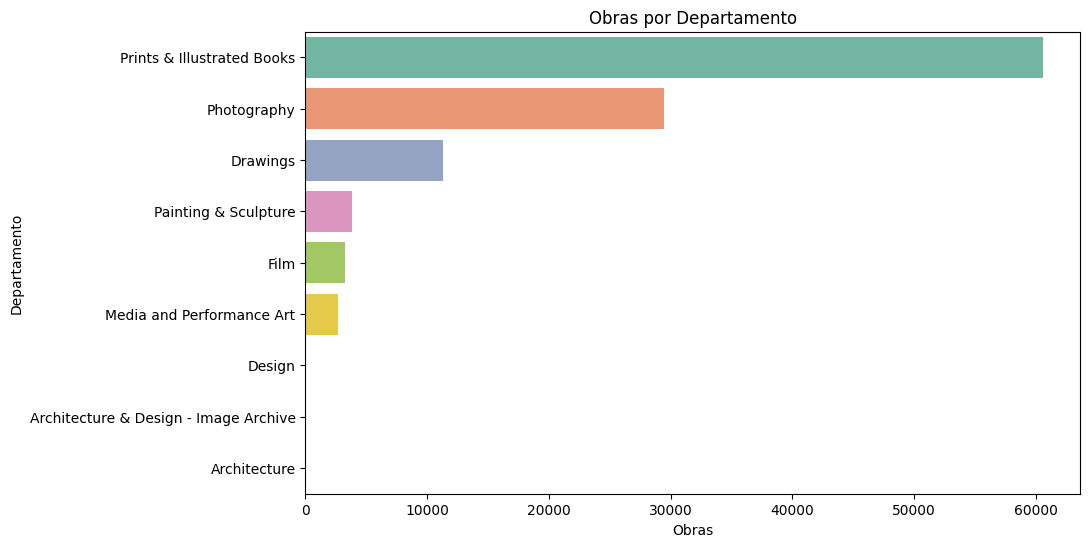

In [169]:
my_colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3', '#ff6f61', '#8e7cc3']

conteo_obras_por_departamento = df.groupby('Department').size().sort_values(ascending=False)
departamentos_seleccionados = [
    'Prints & Illustrated Books',
    'Photography',
    'Drawings',
    'Painting & Sculpture',
    'Film',
    'Media and Performance Art',
    'Design',
    'Architecture & Design - Image Archive',
    'Architecture'
]

conteo_filtrado = conteo_obras_por_departamento[conteo_obras_por_departamento.index.isin(departamentos_seleccionados)]
conteo_filtrado = conteo_filtrado[conteo_filtrado > 0]  # Excluir departamentos con 0 obras
plt.figure(figsize=(10,6))
sns.barplot(x=conteo_filtrado.values, y=conteo_filtrado.index, hue=conteo_filtrado.index, palette=my_colors[:9], legend=False)
plt.title('Obras por Departamento')
plt.xlabel('Obras')
plt.ylabel('Departamento')
plt.show()




Cantidad de obras adquiridas por año

La gráfica muestra un notable incremento en las adquisiciones de obras durante la década de 1960, y otro pico significativo en los años 2000. Esto podría deberse a factores históricos o económicos, como el auge del arte moderno y contemporáneo en los 60, o una expansión de la política de adquisiciones del museo en los 2000. Los períodos de mayor adquisición podrían estar asociados con movimientos artísticos importantes o cambios en las prioridades curatoriales.


<ipython-input-170-0e9949795bc9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Year'] = df['DateAcquired'].dt.year


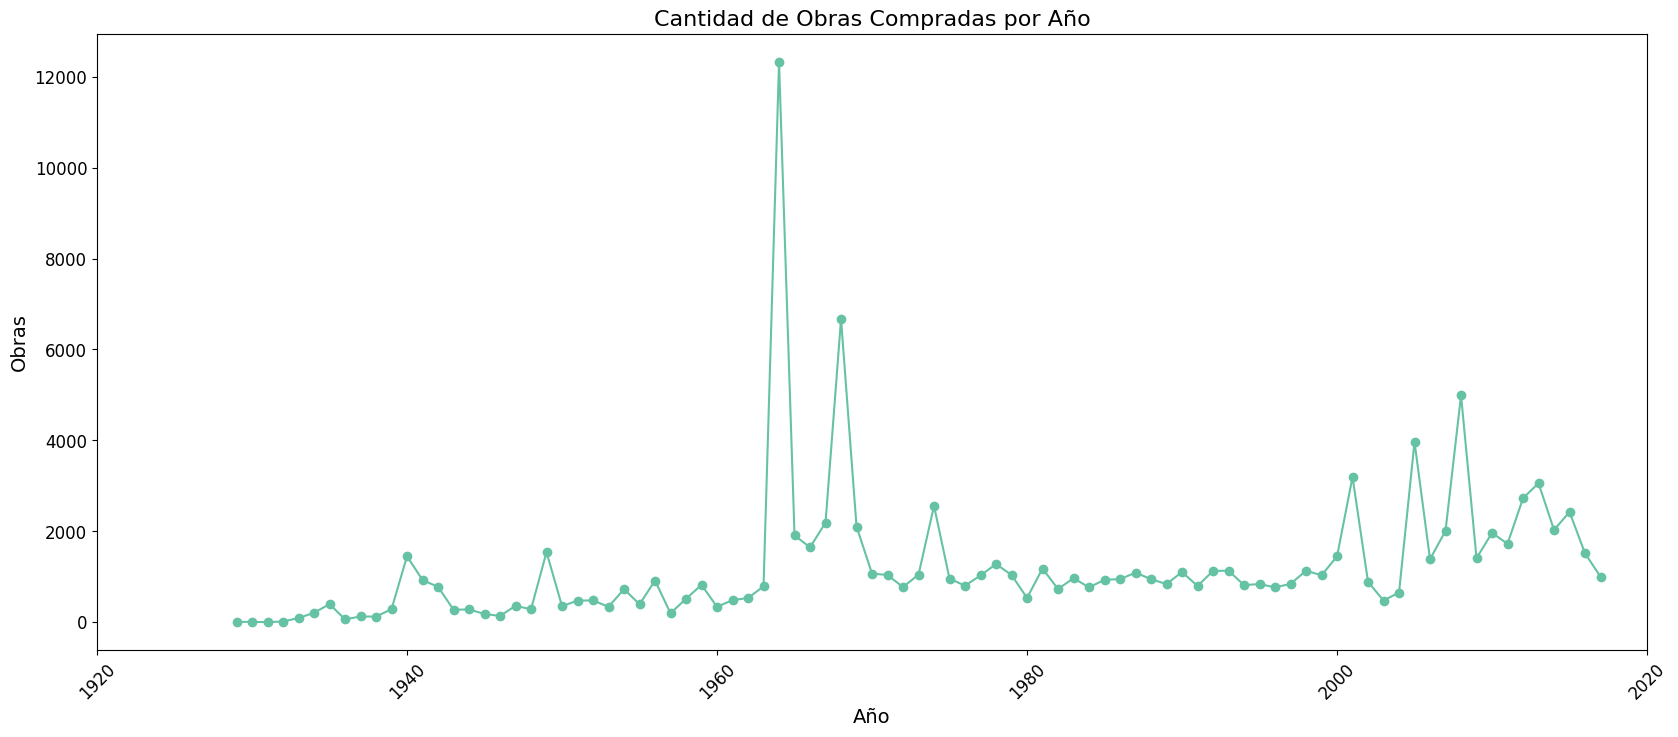

In [170]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df['DateAcquired'] = pd.to_datetime(df['DateAcquired'], errors='coerce')
df = df.dropna(subset=['DateAcquired'])
df.loc[:,'Year'] = df['DateAcquired'].dt.year
year_counts = df['Year'].value_counts().sort_index()

plt.figure(figsize=(20, 8))
plt.plot(year_counts.index, year_counts.values, marker='o', color='#66c2a5')
plt.title('Cantidad de Obras Compradas por Año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Obras', fontsize=14)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.xlim(1920, 2020)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.show()



Nacionalidades con mayor representación

Las nacionalidades que poseen mayor cantidad de obras en el museo son la americana, francesa y alemana. Esto sugiere que el MoMA ha puesto un énfasis particular en adquirir obras de artistas de estos países, lo que puede estar vinculado a la influencia de estas naciones en la historia del arte moderno y contemporáneo.


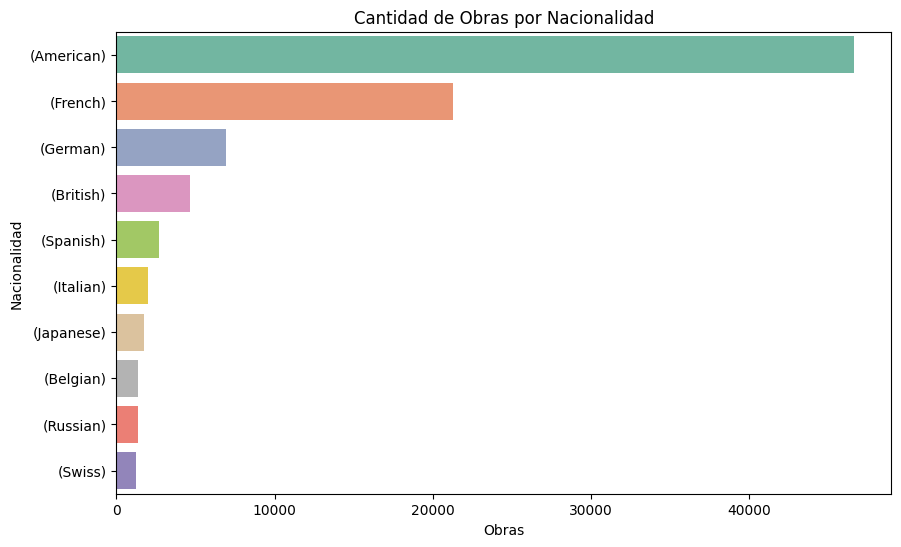

In [171]:
df_sin_vacias = df[df['Nationality'] != '()']
conteo_por_nacionalidad = df_sin_vacias.groupby('Nationality').size().sort_values(ascending=False)
top_nacionalidades = conteo_por_nacionalidad.head(10)

df_nacionalidades_filtradas = df_sin_vacias[df_sin_vacias['Nationality'].isin(top_nacionalidades.index)]
plt.figure(figsize=(10,6))
sns.barplot(x=top_nacionalidades.values, y=top_nacionalidades.index, hue=top_nacionalidades.index, palette=my_colors, legend=False)
plt.title('Cantidad de Obras por Nacionalidad')
plt.xlabel('Obras')
plt.ylabel('Nacionalidad')
plt.show()




Cantidad de artistas por género

El gráfico muestra una clara diferencia en el número de artistas masculinos frente a los femeninos, con una mayor representación de hombres. Esta disparidad refleja un sesgo histórico en la representación de artistas en museos, y podría ser el resultado de barreras de género en el mundo del arte a lo largo de la historia. Este dato pone en evidencia la importancia de revisar las políticas de adquisiciones para asegurar una mayor inclusión de artistas femeninas en el futuro.


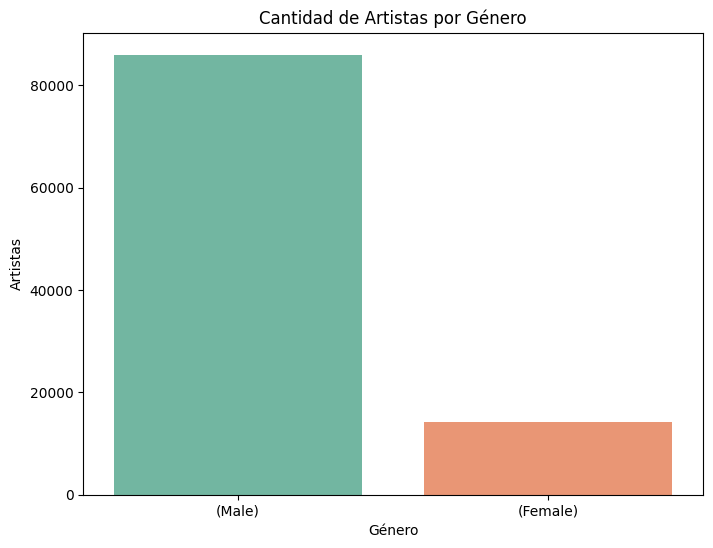

In [172]:
df_gender_filtrado = df[df['Gender'].isin(['(Male)', '(Female)'])]
conteo_por_genero = df_gender_filtrado['Gender'].value_counts()

genero_colors = [my_colors[0], my_colors[1]]
plt.figure(figsize=(8,6))
sns.barplot(x=conteo_por_genero.index, y=conteo_por_genero.values, hue=conteo_por_genero.index, palette=genero_colors, legend=False)
plt.title('Cantidad de Artistas por Género')
plt.xlabel('Género')
plt.ylabel('Artistas')
plt.show()




Artistas con mayor representación

Eugene Atget es el artista con mayor número de obras adquiridas por el MoMA. Este hecho subraya la importancia de su obra dentro de la colección del museo, especialmente en el campo de la fotografía. Atget, conocido por sus registros documentales de París, ha sido un referente clave para la fotografía moderna, lo que explica su prominencia en la colección.


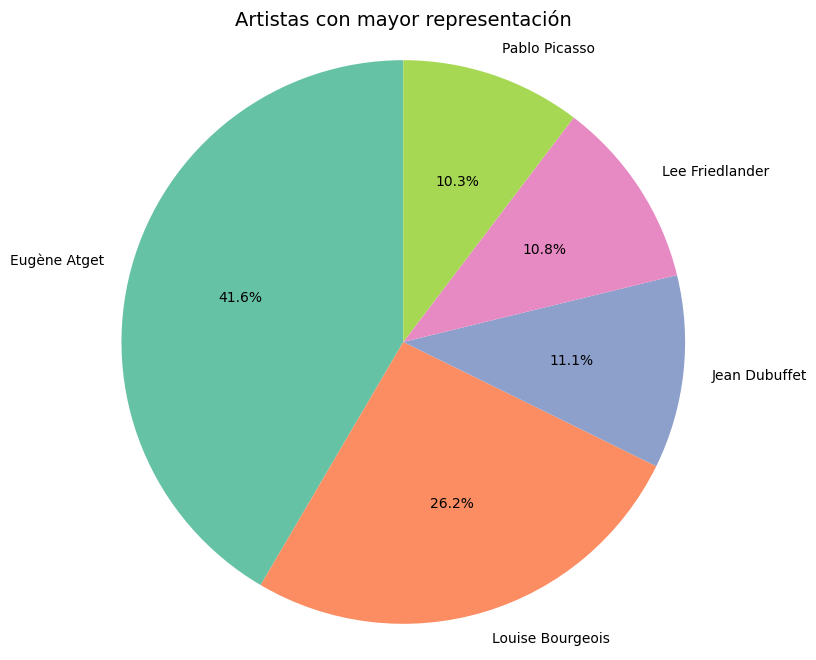

In [173]:
top_artistas = df['Artist'].value_counts()
top_artistas = top_artistas[top_artistas.index != 'Unknown photographer'].head(5)
plt.figure(figsize=(8,8))
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']
plt.pie(top_artistas.values, labels=top_artistas.index, autopct='%1.1f%%',
        startangle=90, colors=colors, textprops={'fontsize': 10, 'color': 'black'})
plt.title('Artistas con mayor representación', fontsize=14, color='black')
plt.axis('equal')
plt.show()



Distribución de adquisiciones por año y género

El gráfico revela una clara disparidad en la representación de género en las adquisiciones del MoMA a lo largo del tiempo. La mayor parte de las adquisiciones de obras de artistas masculinos se concentran entre 1950 y 1990, mientras que las obras de artistas femeninas comienzan a ser adquiridas en mayor cantidad a partir de finales de la década de 1980. Los outliers observados en las adquisiciones de mujeres antes de 1950 indican que, aunque hubo compras de obras realizadas por artistas femeninas, estas fueron esporádicas y no reflejan una tendencia de inclusión generalizada en esos años.


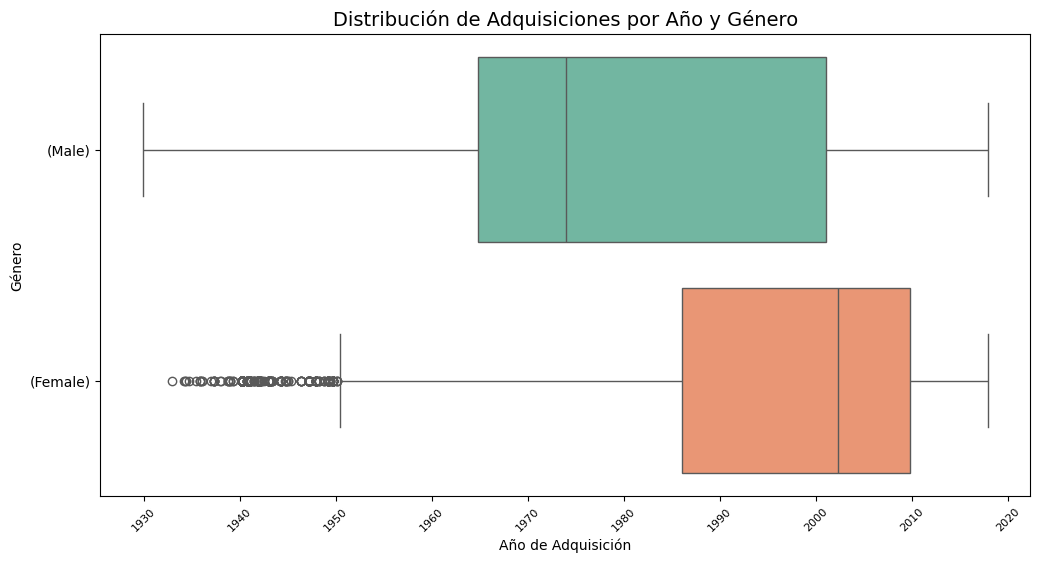

In [174]:
df_gender_filtrado = df[df['Gender'].isin(['(Male)', '(Female)'])]
plt.figure(figsize=(12,6))
sns.boxplot(data=df_gender_filtrado, x='DateAcquired', y='Gender', hue='Gender', palette=my_colors[:2])
plt.title('Distribución de Adquisiciones por Año y Género', fontsize=14)
plt.xlabel('Año de Adquisición', fontsize=10)
plt.ylabel('Género', fontsize=10)
plt.xticks(rotation=45, fontsize=8)

plt.show()

Distribución de obras por tamaño

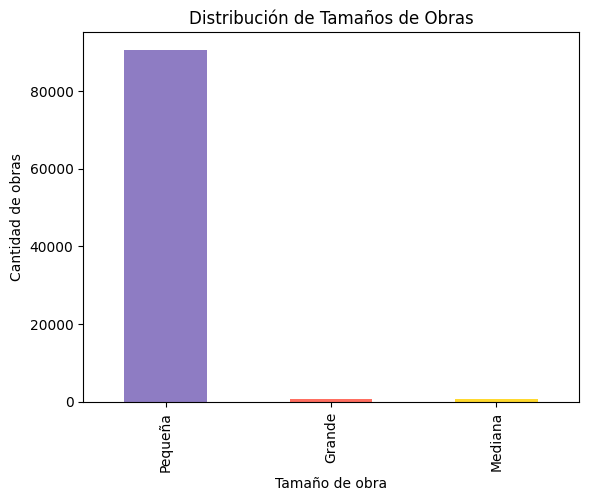

In [175]:
size_category_colors = [my_colors[9], my_colors[8], my_colors[5]]

df['SizeCategory'].value_counts().plot(kind='bar', color=size_category_colors)
plt.xlabel('Tamaño de obra')
plt.ylabel('Cantidad de obras')
plt.title('Distribución de Tamaños de Obras')
plt.show()


Análisis de Outliers con Boxplots


Análisis de outliers para: Height (cm)
Cantidad de outliers encontrados: 6523


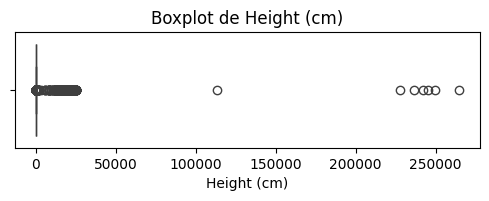


Análisis de outliers para: Width (cm)
Cantidad de outliers encontrados: 6699


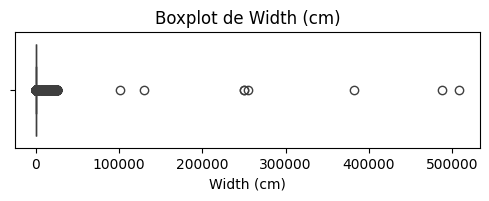


Análisis de outliers para: Depth (cm)
Cantidad de outliers encontrados: 362


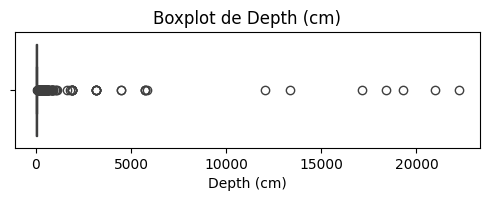


Análisis de outliers para: DateAcquired
Cantidad de outliers encontrados: 0


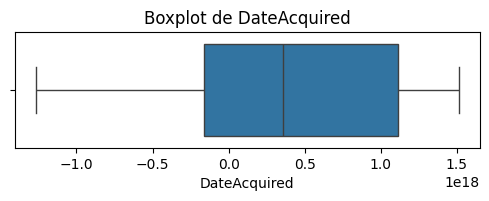


Análisis de outliers para: Height (cm)
Cantidad de outliers encontrados: 6523


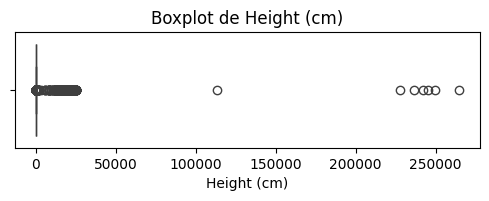


Análisis de outliers para: Width (cm)
Cantidad de outliers encontrados: 6699


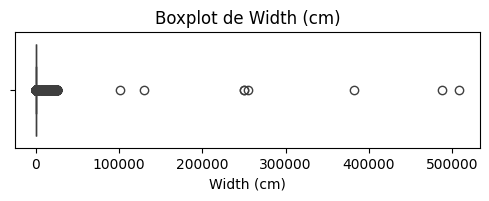


Análisis de outliers para: Depth (cm)
Cantidad de outliers encontrados: 362


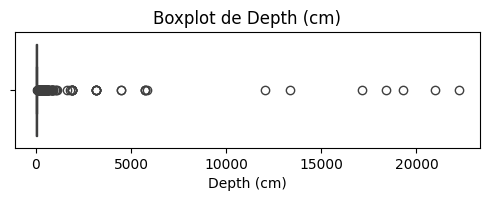


Análisis de outliers para: DateAcquired
Cantidad de outliers encontrados: 0


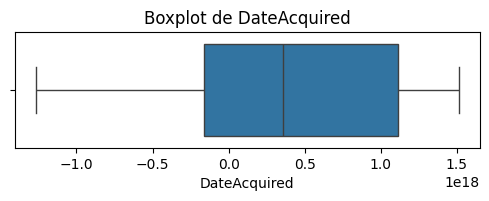


Análisis de outliers para: ArtistWorkCount
Cantidad de outliers encontrados: 16805


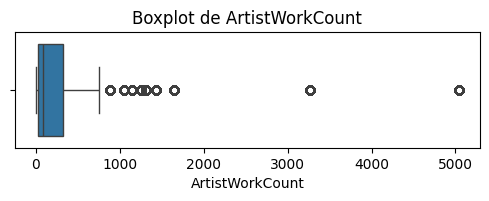


Análisis de outliers para: AcquisitionsByCountry
Cantidad de outliers encontrados: 0


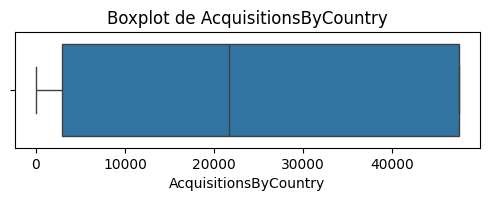

In [176]:
numeric_cols = ['Height (cm)', 'Width (cm)', 'Depth (cm)', 'DateAcquired']

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

df[numeric_cols] = df[numeric_cols].replace(0, np.nan)

def detectar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return outliers

for col in numeric_cols:
    if col in df.columns:
        print(f"\nAnálisis de outliers para: {col}")
        outliers = detectar_outliers_iqr(df, col)
        print(f"Cantidad de outliers encontrados: {len(outliers)}")


        plt.figure(figsize=(6, 1.5))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot de {col}')
        plt.show()

# Columnas personalizadas
extra_cols = ['ArtistWorkCount', 'AcquisitionsByCountry']
all_cols = numeric_cols + extra_cols


for col in all_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


df[all_cols] = df[all_cols].replace(0, np.nan)


def detectar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return outliers


for col in all_cols:
    if col in df.columns:
        print(f"\nAnálisis de outliers para: {col}")
        outliers = detectar_outliers_iqr(df, col)
        print(f"Cantidad de outliers encontrados: {len(outliers)}")

        plt.figure(figsize=(6, 1.5))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot de {col}')
        plt.show()



Preparación de Datos Numéricos para Análisis Multidimensional

In [177]:
from mpl_toolkits.mplot3d import Axes3D

numeric_cols = ['Height (cm)', 'Width (cm)', 'Depth (cm)', 'ArtistWorkCount', 'AcquisitionsByCountry']
df_numeric = df[numeric_cols].copy()

for col in df_numeric.columns:
    df_numeric[col] = pd.to_numeric(df_numeric[col], errors='coerce')

df_numeric = df_numeric.dropna()




Scatter Plot - Height vs Width

Este gráfico de dispersión permite visualizar la relación entre la altura y el ancho de las obras. Cada punto representa una obra individual, y su posición está determinada por sus dimensiones. Este tipo de gráfico es útil para detectar patrones de proporcionalidad o identificar posibles outliers en las dimensiones físicas de las piezas.

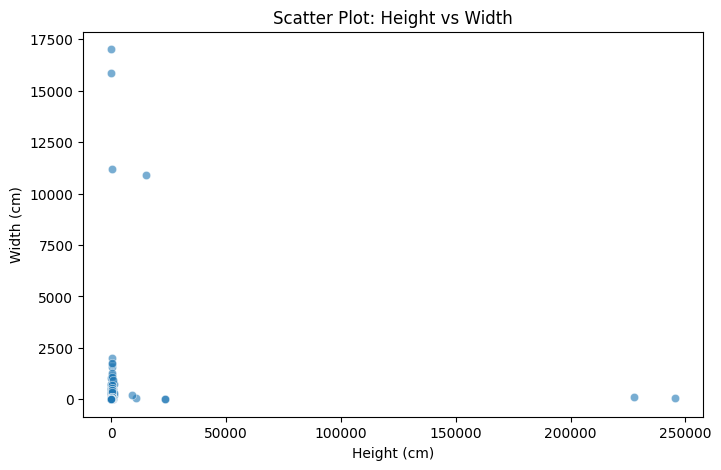

In [178]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_numeric['Height (cm)'], y=df_numeric['Width (cm)'], alpha=0.6)
plt.xlabel("Height (cm)")
plt.ylabel("Width (cm)")
plt.title("Scatter Plot: Height vs Width")
plt.show()

Bubble Plot - Ancho vs Altura (Tamaño según cantidad de obras por artista)

El gráfico de burbujas es una extensión del scatter plot en el que el tamaño de cada punto representa una tercera variable, en este caso, la cantidad de obras asociadas a un artista. Esto permite analizar no solo la relación entre el alto y el ancho de las obras, sino también identificar visualmente qué artistas están más representados en el conjunto de datos.

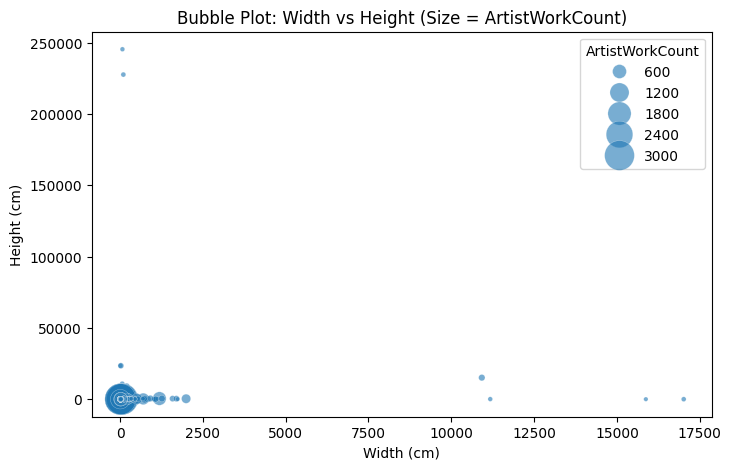

In [179]:

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_numeric['Width (cm)'], y=df_numeric['Height (cm)'],
                size=df_numeric['ArtistWorkCount'], sizes=(10, 500), alpha=0.6)
plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")
plt.title("Bubble Plot: Width vs Height (Size = ArtistWorkCount)")
plt.legend(title="ArtistWorkCount")
plt.show()

Matriz de Dispersión

El pairplot muestra múltiples relaciones bivariadas entre las variables numéricas seleccionadas. Esta matriz de gráficos de dispersión permite observar correlaciones visuales, distribución de las variables y posibles agrupamientos de datos. Es una herramienta fundamental en la etapa de análisis exploratorio para detectar patrones complejos entre variables.

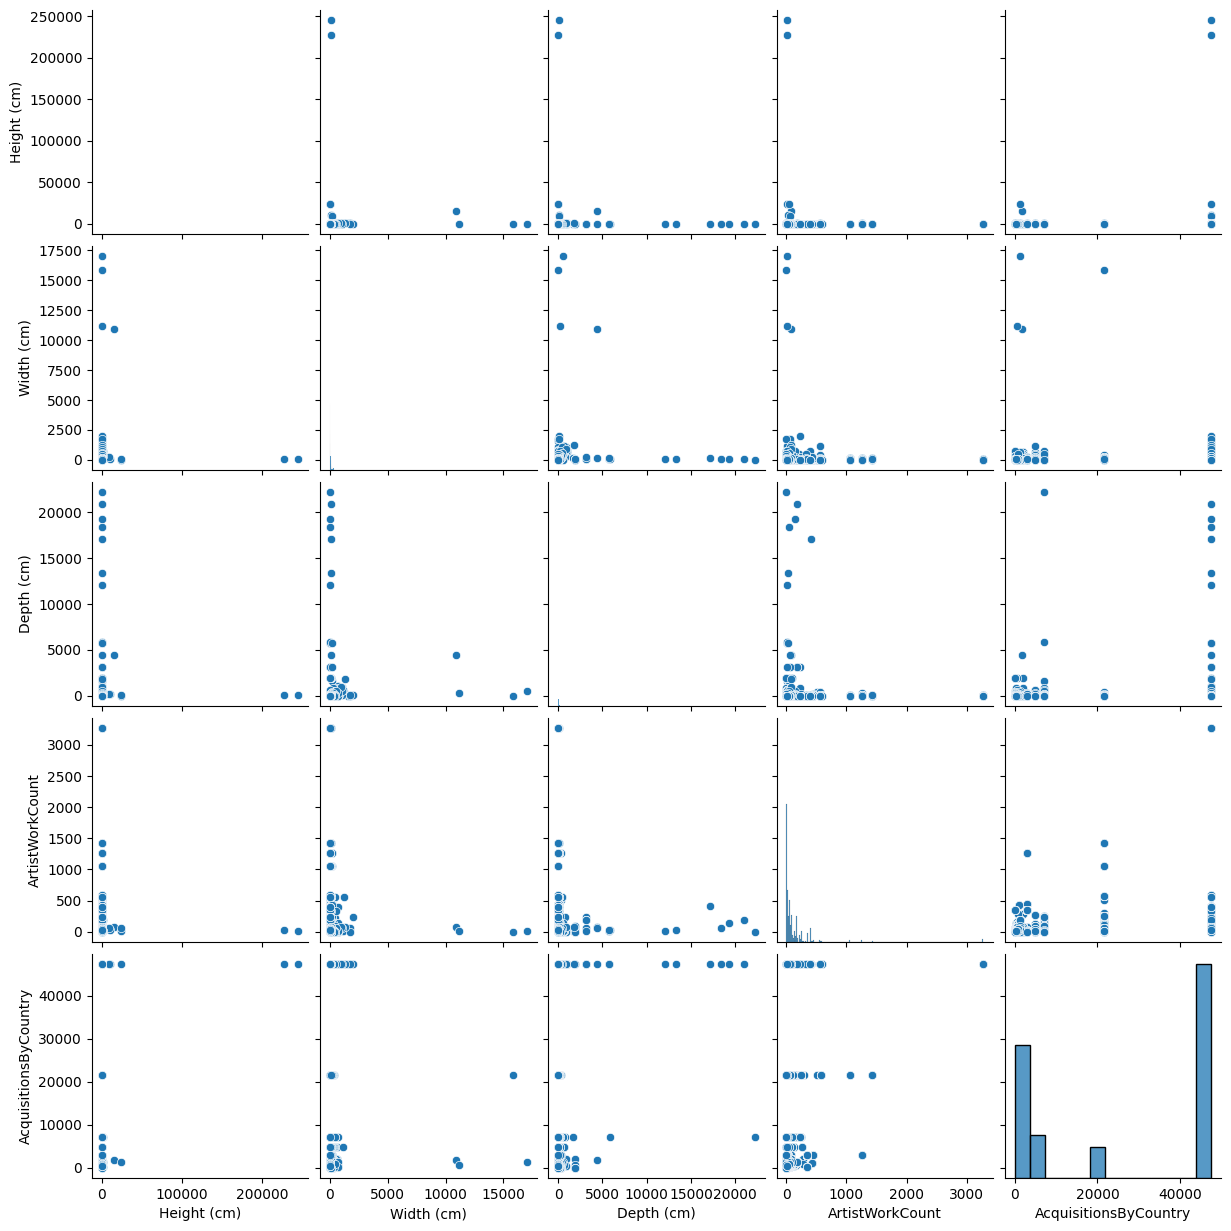

In [180]:
sns.pairplot(df_numeric)
plt.show()

Mapa de Calor de Correlaciones

El mapa de calor muestra la correlación entre las variables numéricas del dataset. Se utiliza para identificar qué variables están más fuertemente relacionadas entre sí, lo que puede ser útil para la selección de características en modelos predictivos o para detectar redundancia en los datos. Los valores más cercanos a 1 o -1 indican una alta correlación positiva o negativa respectivamente.

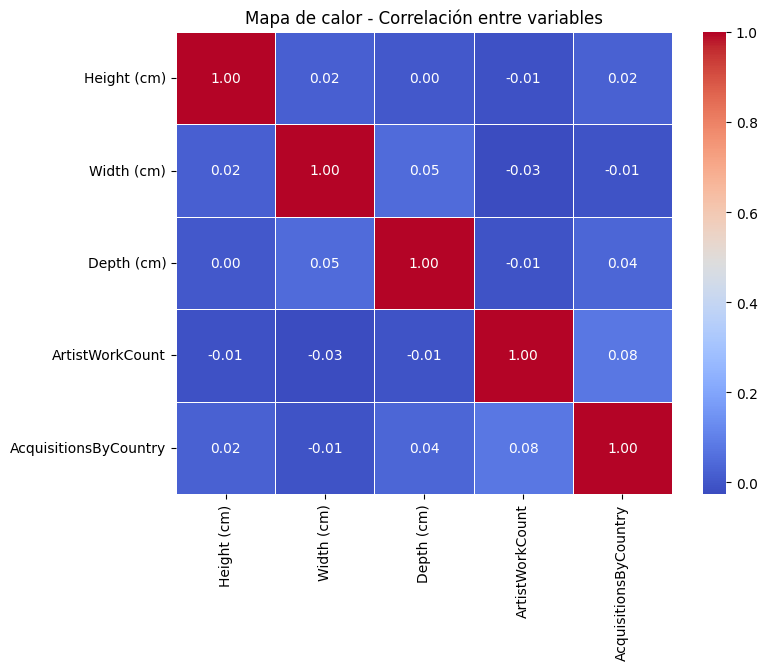

In [181]:

plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor - Correlación entre variables")
plt.show()

3D Scatter Plot

Este gráfico tridimensional permite observar la relación entre las tres dimensiones físicas de las obras: altura, ancho y profundidad. Es especialmente útil para visualizar piezas tridimensionales y detectar agrupamientos, tendencias o valores atípicos en el espacio volumétrico.

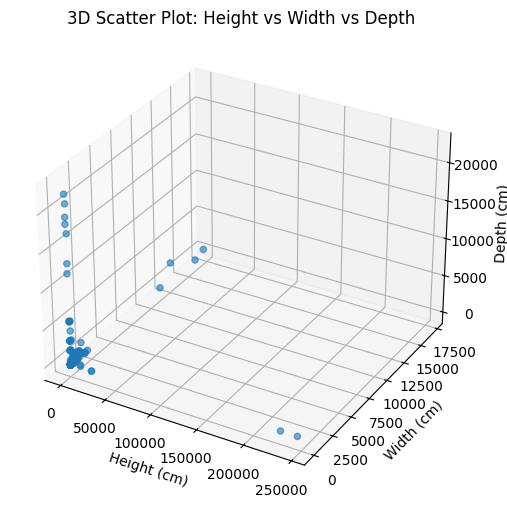

In [182]:

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_numeric['Height (cm)'], df_numeric['Width (cm)'], df_numeric['Depth (cm)'], alpha=0.6)
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Width (cm)")
ax.set_zlabel("Depth (cm)")
ax.set_title("3D Scatter Plot: Height vs Width vs Depth")
plt.show()

# ***Entrenamiento de modelos***

In [183]:
df = df.sample(frac=0.05, random_state=42).reset_index(drop=True)

Preparación de datos para modelo de Regresión

In [184]:
y_reg = df['YearAcquired']

cols_to_drop = ['YearAcquired', 'ThumbnailURL', 'Seat Height (cm)', 'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Length (cm)', 'Weight (kg)']
X_reg = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

X_reg = pd.get_dummies(X_reg, drop_first=True)

from sklearn.model_selection import train_test_split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)



Preparación de datos para modelo de Clasificación

In [185]:
df['YearGroup'] = pd.cut(df['YearAcquired'], bins=range(1900, 2026, 5), right=False)
df['YearGroup'] = df['YearGroup'].astype(str)

cols_to_drop_class = ['YearAcquired', 'YearGroup', 'ThumbnailURL', 'Seat Height (cm)', 'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Length (cm)', 'Weight (kg)']
X_class = df.drop(columns=[col for col in cols_to_drop_class if col in df.columns])
y_class = df['YearGroup']

X_class = pd.get_dummies(X_class, drop_first=True)

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)


Entrenamiento modelo de Regresión

In [186]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_reg, y_train_reg)
y_pred_tree_reg = tree_reg.predict(X_test_reg)

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf_reg = rf_reg.predict(X_test_reg)


Evaluación de modelo de regresión

In [187]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def eval_reg(y_test, y_pred, name="Modelo"):
    print(f"--- {name} ---")
    print(f"R²: {r2_score(y_test, y_pred):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}\n")

eval_reg(y_test_reg, y_pred_tree_reg, "Decision Tree Regressor")
eval_reg(y_test_reg, y_pred_rf_reg, "Random Forest Regressor")


--- Decision Tree Regressor ---
R²: 1.00
MAE: 0.00
RMSE: 0.05

--- Random Forest Regressor ---
R²: 1.00
MAE: 0.00
RMSE: 0.02



Entrenamiento modelo de Clasificación

In [188]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

tree_class = DecisionTreeClassifier(random_state=42)
tree_class.fit(X_train_class, y_train_class)
y_pred_tree_class = tree_class.predict(X_test_class)

rf_class = RandomForestClassifier(random_state=42)
rf_class.fit(X_train_class, y_train_class)
y_pred_rf_class = rf_class.predict(X_test_class)


Evaluación modelo de Clasificación

In [189]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def eval_class(y_test, y_pred, name="Modelo"):
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")

eval_class(y_test_class, y_pred_tree_class, "Decision Tree Classifier")
eval_class(y_test_class, y_pred_rf_class, "Random Forest Classifier")


--- Decision Tree Classifier ---
Accuracy: 1.00
Confusion Matrix:
[[  2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  10   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  41   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  22   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  23   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  32   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 142   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 154   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  72   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  57   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  43   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  47   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 

Modelo de Clasificación: Obras según el Departamento del MoMA

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# TARGET: Departamento
df_dept = df.copy()
df_dept = df_dept[df_dept['Department'].notnull()]
df_dept = df_dept.dropna(subset=['Medium', 'Classification'])

# Inputs y target
X_dept = df_dept[['Medium', 'Classification', 'YearAcquired']]
y_dept = df_dept['Department']

X_dept = pd.get_dummies(X_dept)

X_train_dept, X_test_dept, y_train_dept, y_test_dept = train_test_split(X_dept, y_dept, test_size=0.2, random_state=42)

model_dept = RandomForestClassifier(random_state=42)
model_dept.fit(X_train_dept, y_train_dept)
y_pred_dept = model_dept.predict(X_test_dept)

print(classification_report(y_test_dept, y_pred_dept))


                            precision    recall  f1-score   support

                  Drawings       1.00      0.98      0.99       117
                      Film       1.00      1.00      1.00        25
 Media and Performance Art       1.00      0.70      0.82        23
      Painting & Sculpture       0.94      0.94      0.94        35
               Photography       0.99      1.00      0.99       287
Prints & Illustrated Books       0.98      1.00      0.99       513

                  accuracy                           0.99      1000
                 macro avg       0.99      0.94      0.96      1000
              weighted avg       0.99      0.99      0.99      1000



Modelo de Clasificación: ¿Obra Moderna o Histórica?

In [191]:
df_modern = df.copy()
df_modern = df_modern.dropna(subset=['Medium', 'Classification'])

df_modern['EsModerna'] = (df_modern['YearAcquired'] >= 1980).astype(int)

X_modern = df_modern[['Medium', 'Classification']]
y_modern = df_modern['EsModerna']

X_modern = pd.get_dummies(X_modern)

X_train_mod, X_test_mod, y_train_mod, y_test_mod = train_test_split(X_modern, y_modern, test_size=0.2, random_state=42)

model_mod = RandomForestClassifier(random_state=42)
model_mod.fit(X_train_mod, y_train_mod)
y_pred_mod = model_mod.predict(X_test_mod)

print(classification_report(y_test_mod, y_pred_mod))


              precision    recall  f1-score   support

           0       0.80      0.68      0.74       464
           1       0.76      0.86      0.80       536

    accuracy                           0.78      1000
   macro avg       0.78      0.77      0.77      1000
weighted avg       0.78      0.78      0.77      1000



Clasificación de Obras Modernas con Variables Sintéticas

Este modelo utiliza variables derivadas como la antigüedad de adquisición, el tamaño estimado de la obra, la popularidad del artista, y la cantidad de adquisiciones por país, entre otras. Se entrena un modelo `RandomForestClassifier` para predecir si una obra fue adquirida a partir del año 1980.


In [192]:
from datetime import datetime

df['YearsSinceAcquired'] = datetime.now().year - df['YearAcquired']
df['Decade'] = (df['YearAcquired'] // 10) * 10
df['ArtistWorkCount'] = df.groupby('Artist')['Artist'].transform('count')
df['Area'] = df['Height (cm)'] * df['Width (cm)']
df['SizeCategory'] = pd.cut(df['Area'], bins=[0, 50000, 200000, float('inf')],
                        	labels=['Pequeña', 'Mediana', 'Grande'])
df['AcquisitionsByCountry'] = df.groupby('Nationality')['Nationality'].transform('count')

# VARIABLE OBJETIVO
df['ObraModerna'] = df['YearAcquired'] >= 1980

#SELECCIÓN DE VARIABLES
features = [
	'YearsSinceAcquired', 'ArtistWorkCount', 'AcquisitionsByCountry',
	'SizeCategory', 'Medium', 'Classification', 'Department', 'Nationality'
]

X = df[features]
y = df['ObraModerna']

# ENCODING
X = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

clf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# EVALUACIÓN
print("Accuracy (train):", accuracy_score(y_train, y_pred_train))
print("Accuracy (test):", accuracy_score(y_test, y_pred_test))
print("Reporte clasificación (test):")
print(classification_report(y_test, y_pred_test))


Accuracy (train): 0.9427849264705882
Accuracy (test): 0.931129476584022
Reporte clasificación (test):
              precision    recall  f1-score   support

       False       0.98      0.88      0.93       555
        True       0.89      0.98      0.93       534

    accuracy                           0.93      1089
   macro avg       0.94      0.93      0.93      1089
weighted avg       0.94      0.93      0.93      1089



Modelo de Clasificación del Origen de la Obra: Nacional vs. Extranjera


In [193]:
df_nat = df.copy()
df_nat['EsNacional'] = df_nat['Nationality'].apply(lambda x: 'American' in str(x)).astype(int)
df_nat = df_nat.dropna(subset=['Medium', 'Classification'])

X_nat = df_nat[['Medium', 'Classification']]
y_nat = df_nat['EsNacional']

X_nat = pd.get_dummies(X_nat)

X_train_nat, X_test_nat, y_train_nat, y_test_nat = train_test_split(X_nat, y_nat, test_size=0.2, random_state=42)

model_nat = RandomForestClassifier(random_state=42)
model_nat.fit(X_train_nat, y_train_nat)
y_pred_nat = model_nat.predict(X_test_nat)

print(classification_report(y_test_nat, y_pred_nat))


              precision    recall  f1-score   support

           0       0.80      0.57      0.67       519
           1       0.65      0.85      0.73       481

    accuracy                           0.70      1000
   macro avg       0.73      0.71      0.70      1000
weighted avg       0.73      0.70      0.70      1000



GridSearch para Random Forest (Regresión)

In [194]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid_reg = {
    'n_estimators': [50],
    'max_depth': [5, None],
    'min_samples_split': [2]
}

grid_reg = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid_reg,
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_reg.fit(X_train_reg, y_train_reg)

print("Mejores parámetros:", grid_reg.best_params_)
print("Mejor score (CV):", grid_reg.best_score_)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Mejores parámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Mejor score (CV): 0.9999953366779925


Métricas - Train vs. Test (Regresión)

In [195]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_train_pred = grid_reg.predict(X_train_reg)
y_test_pred = grid_reg.predict(X_test_reg)

print("REGRESIÓN")
print("R² (train):", r2_score(y_train_reg, y_train_pred))
print("R² (test):", r2_score(y_test_reg, y_test_pred))
print("MAE (test):", mean_absolute_error(y_test_reg, y_test_pred))
print("RMSE (test):", np.sqrt(mean_squared_error(y_test_reg, y_test_pred)))


REGRESIÓN
R² (train): 0.9999995132598263
R² (test): 0.9999985448122035
MAE (test): 0.003158861340678946
RMSE (test): 0.026334013312001945


GridSearch para Random Forest (Clasificación)

In [196]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid_clf = {
    'n_estimators': [50],
    'max_depth': [5, None],
    'min_samples_split': [2]
}

grid_clf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_clf,
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_clf.fit(X_train_class, y_train_class)

print("Mejores parámetros:", grid_clf.best_params_)
print("Mejor score (CV):", grid_clf.best_score_)



Fitting 3 folds for each of 2 candidates, totalling 6 fits
Mejores parámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Mejor score (CV): 0.8439787067183157


Métricas - Train vs. Test (Clasificación)

In [197]:
from sklearn.metrics import accuracy_score

y_train_pred = grid_clf.predict(X_train_class)
y_test_pred = grid_clf.predict(X_test_class)

print("Accuracy (train):", accuracy_score(y_train_class, y_train_pred))
print("Accuracy (test):", accuracy_score(y_test_class, y_test_pred))


Accuracy (train): 1.0
Accuracy (test): 0.8778696051423324


# ***Conclusiones***



Este proyecto buscó analizar las adquisiciones del MoMA con técnicas de Machine Learning para identificar patrones y tendencias relacionadas con los artistas, nacionalidades, técnicas y evolución temporal de las obras.

---

### 📊 Hallazgos clave

- Se observaron cambios en la **representación por nacionalidad** a lo largo del tiempo, con un crecimiento en obras extranjeras en décadas recientes.
- Las técnicas y materiales más frecuentes han variado significativamente desde 1950, mostrando una preferencia creciente por ciertos medios contemporáneos.
- A través del modelado, se comprobó que variables como **popularidad del artista**, **antigüedad de la adquisición** y **clasificación del objeto** tienen impacto en si una obra es moderna o no.

---

### 🤖 Rendimiento de los modelos

- Se aplicaron modelos de regresión y clasificación. Los modelos con **variables sintéticas** mejoraron el rendimiento general.
- El mejor modelo fue un `RandomForestClassifier` para predecir si una obra fue adquirida después de 1980, con una accuracy sólida y buena generalización.
- También se entrenó un modelo utilizando **variables sintéticas creadas a partir de los datos originales**, como la antigüedad de adquisición (`YearsSinceAcquired`), la popularidad del artista (`ArtistWorkCount`), y una clasificación del tamaño estimado de la obra (`SizeCategory`). Este modelo logró una performance sólida al predecir si una obra era moderna (posterior a 1980), demostrando que el enriquecimiento de variables puede mejorar significativamente la capacidad predictiva del modelo.


- Se observó que los modelos simples tendían a *underfitting*, mientras que otros con mayor complejidad o sin tuning presentaban *overfitting*. El uso de `GridSearchCV` ayudó a mitigar este problema.

---

### 📈 Reflexión técnica: bias-variance tradeoff

Se identificó la importancia de encontrar un balance entre modelos complejos que ajustan bien al set de entrenamiento, y la capacidad de generalizar. En algunos casos, la diferencia entre train y test fue alta, lo cual evidenció **overfitting**, mientras que otros modelos con bajo rendimiento general mostraron **underfitting**. Los modelos optimizados mediante `GridSearchCV` ofrecieron un mejor balance entre bias y varianza.

---

### 🧠 Aprendizaje y próximos pasos

- Incluir más variables como el rol del curador o evento de adquisición.
- Explorar modelos basados en texto, por ejemplo utilizando embeddings para el campo `Title` o `Medium`.
- Evaluar la interpretabilidad de los modelos con herramientas como `SHAP` o `feature_importance_`.

---

🎨 El uso de Machine Learning permitió no solo modelar tendencias del MoMA, sino también entender mejor los factores que influyen en sus decisiones curatoriales.


